In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('primary_data_final.csv')

In [3]:
data.head()

,Gender,Literacy,Age,Monthly Income,Location,Type of House,APL/BPL,Marital Status,Employment,Bank Account,Reason for having Bank Accout,Reason for not having Bank Account
0,M,1,3,1,1,2,1,1,2,1,13,6
1,M,3,4,2,1,2,1,1,2,2,7,1
2,F,1,2,1,2,1,2,1,1,1,1,6
3,F,2,4,1,2,2,2,1,2,1,1,6
4,F,2,3,1,2,2,2,1,2,1,5,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Gender                              78 non-null     object
 1   Literacy                            78 non-null     int64 
 2   Age                                 78 non-null     int64 
 3   Monthly Income                      78 non-null     int64 
 4   Location                            78 non-null     int64 
 5   Type of House                       78 non-null     int64 
 6   APL/BPL                             78 non-null     int64 
 7   Marital Status                      78 non-null     int64 
 8   Employment                          78 non-null     int64 
 9   Bank Account                        78 non-null     int64 
 10  Reason for having Bank Accout       78 non-null     int64 
 11  Reason for not having Bank Account  78 non-null     int64 
d

In [5]:
data.shape

(78, 12)

In [6]:
data.isnull().sum()

Gender                                0
Literacy                              0
Age                                   0
Monthly Income                        0
Location                              0
Type of House                         0
APL/BPL                               0
Marital Status                        0
Employment                            0
Bank Account                          0
Reason for having Bank Accout         0
Reason for not having Bank Account    0
dtype: int64

In [7]:
data.describe()

,Literacy,Age,Monthly Income,Location,Type of House,APL/BPL,Marital Status,Employment,Bank Account,Reason for having Bank Accout,Reason for not having Bank Account
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,3.012821,2.358974,2.192308,2.012821,1.858974,1.166667,1.410256,2.076923,1.192308,4.423077,5.217949
std,1.324039,1.248109,1.289898,0.764362,0.350301,0.375090,0.495064,0.818126,0.396664,2.085941,1.702919
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000
50%,3.000000,2.500000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,4.000000,6.000000
75%,4.000000,3.750000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,6.000000,6.000000
max,5.000000,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,13.000000,6.000000


In [8]:
from sklearn.preprocessing import LabelBinarizer

In [9]:
en=LabelBinarizer()

In [10]:
data['Gender']= pd.DataFrame(en.fit_transform(data['Gender']))

In [11]:
data.head(5)

,Gender,Literacy,Age,Monthly Income,Location,Type of House,APL/BPL,Marital Status,Employment,Bank Account,Reason for having Bank Accout,Reason for not having Bank Account
0,1,1,3,1,1,2,1,1,2,1,13,6
1,1,3,4,2,1,2,1,1,2,2,7,1
2,0,1,2,1,2,1,2,1,1,1,1,6
3,0,2,4,1,2,2,2,1,2,1,1,6
4,0,2,3,1,2,2,2,1,2,1,5,6


In [12]:
from sklearn.model_selection import train_test_split

In [27]:
X=data.drop(columns=['Bank Account','Reason for having Bank Accout','Reason for not having Bank Account'])
y=data['Bank Account']

In [28]:
X.columns

Index(['Gender', 'Literacy', 'Age', 'Monthly Income', 'Location',
       'Type of House', 'APL/BPL', 'Marital Status', 'Employment'],
      dtype='object')

In [29]:
y.head(1)

0    1
Name: Bank Account, dtype: int64

In [30]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [32]:
LR.fit(X_train,y_train)

LinearRegression()

In [33]:
LR.predict(X_test)

array([1.39353575, 1.28686803, 1.08779905, 1.32864834, 1.24615707,
       1.00186673, 1.2074955 , 1.30341248, 1.05573954, 0.99410812,
       0.96435194, 1.15765407, 1.13223888, 1.14155378, 1.21564115,
       1.20881402])

In [34]:
LR.score(X_test,y_test)

0.0423341420282255

In [35]:
LR.coef_

array([ 0.0093149 ,  0.00735272, -0.03793337, -0.08984399, -0.03947698,
       -0.17672534,  0.05798361, -0.1217965 ,  0.04984143])

In [36]:
LR.intercept_


1.8309022057473245

In [37]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)
regressor.predict(X_test)
regressor.score(X_test,y_test)

0.4181818181818182

In [38]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=2, random_state=42)
reg.fit(X_train,y_train)
reg.predict(X_test)
reg.score(X_test,y_test)

-0.0691950567305224

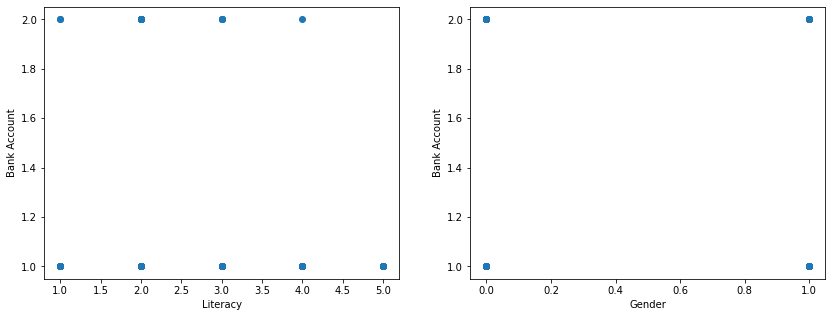

In [39]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(data['Literacy'], data['Bank Account'])
plt.ylabel('Bank Account')
plt.xlabel('Literacy')

plt.subplot(1,2,2)
plt.scatter(data['Gender'], data['Bank Account'])
plt.ylabel('Bank Account')
plt.xlabel('Gender')

plt.show()

In [40]:
std_score=reg.score(X_test,y_test)
std_score

-0.0691950567305224

In [41]:
data1={'Gender':[0],'Literacy':[0],'Age':[0],'Monthly Income':[0],'Location':[0],'Type of House':[0],'APL/BPL':[0],'Marital Status':[0],'Employment':[0]}
f_imp=pd.DataFrame(data1)
f_imp.head()

,Gender,Literacy,Age,Monthly Income,Location,Type of House,APL/BPL,Marital Status,Employment
0,0,0,0,0,0,0,0,0,0


In [44]:
valid=X_test.copy()
valid['Gender']=np.random.permutation(valid['Gender'])
reg.score(valid,y_test)

-0.0667950762576004

In [43]:
f_imp['Gender']=std_score-reg.score(valid,y_test)
f_imp.head()

,Gender,Literacy,Age,Monthly Income,Location,Type of House,APL/BPL,Marital Status,Employment
0,0.000719,0,0,0,0,0,0,0,0


In [45]:
valid=X_test.copy()
valid['Literacy']=np.random.permutation(valid['Literacy'])
reg.score(valid,y_test)

-0.19603455480964405

In [46]:
f_imp['Literacy']=std_score-reg.score(valid,y_test)
f_imp.head()

,Gender,Literacy,Age,Monthly Income,Location,Type of House,APL/BPL,Marital Status,Employment
0,0.000719,0.126839,0,0,0,0,0,0,0


In [ ]:
valid=X_test.copy()
valid['Age']=np.random.permutation(valid['Age'])
reg.score(valid,y_test)

In [ ]:
f_imp['Age']=std_score-reg.score(valid,y_test)
f_imp.head()

In [ ]:
valid=X_test.copy()
valid['Monthly Income']=np.random.permutation(valid['Monthly Income'])
reg.score(valid,y_test)

In [ ]:
f_imp['Monthly Income']=std_score-reg.score(valid,y_test)
f_imp.head()

In [ ]:
valid=X_test.copy()
valid['Location']=np.random.permutation(valid['Location'])
reg.score(valid,y_test)

In [ ]:
f_imp['Location']=std_score-reg.score(valid,y_test)
f_imp.head()

In [ ]:
valid=X_test.copy()
valid['Type of House']=np.random.permutation(valid['Type of House'])
reg.score(valid,y_test)

In [ ]:
f_imp['Type of House']=std_score-reg.score(valid,y_test)
f_imp.head()

In [ ]:
valid=X_test.copy()
valid['APL/BPL']=np.random.permutation(valid['APL/BPL'])
reg.score(valid,y_test)

In [ ]:
f_imp['APL/BPL']=std_score-reg.score(valid,y_test)
f_imp.head()

In [ ]:
valid=X_test.copy()
valid['Marital Status']=np.random.permutation(valid['Marital Status'])
reg.score(valid,y_test

In [ ]:
f_imp['Marital Status']=std_score-reg.score(valid,y_test)
f_imp.head()

In [ ]:
valid=X_test.copy()
valid['Employment']=np.random.permutation(valid['Employment'])
reg.score(valid,y_test

In [ ]:
f_imp['APL/BPL']=std_score-reg.score(valid,y_test)
f_imp.head()